# Analyzing Cryptocurrencies Data Analysis
 By Brian Phan

## Introduction

In this report, I will be analyzing the performance of Bitcoin (BTC), Ethereum (ETH), and Litecoin (LTE) in relation to each other. The reason I chose these 4 to examine is based on history, market capitalization, and personal investments. I will be reviewing specifically the following topics:

- Price to USD
- 5 and 30 day Return on Investment
- The current supply of crypto units

Data was gathered as CSVs from coinmetrics.io. on 05/14/2021.


## Data Wrangling

In [42]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [43]:
#Importing each CSV into DataFrames
btc = pd.read_csv('D:\Desktop\Analyzing Crypto\Datasets\BTC.csv')
eth = pd.read_csv('D:\Desktop\Analyzing Crypto\Datasets\ETH.csv')
ltc = pd.read_csv('D:\Desktop\Analyzing Crypto\Datasets\LTC.csv')
btc.head()

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2009-01-03,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0,0,0,0,0,0,0,0,0,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning and Assessing Data

These files have a lot of extra columns and rows, so we will need to clean up the data to those that we need. We also want to keep the data recent from 2018. Specifically, the columns we will keep are:

- PriceUSD: The fixed closing price of the asset denominated in USD
- SplyCur: Suppy, current

In [44]:
# Selecting only the columns we need. Easier to filter than to drop since there's so many columns.
btc_filter = btc[['date','PriceUSD','SplyCur']]
btc_clean = btc_filter[btc_filter['date'] > '2018']
btc_clean = btc_clean.set_index('date')
btc_clean.head()

,PriceUSD,SplyCur
date,,
2018-01-01,13464.653612,1.677635e+07
2018-01-02,14754.322205,1.677849e+07
2018-01-03,15010.286160,1.678045e+07
2018-01-04,15070.300799,1.678255e+07
2018-01-05,16997.227408,1.678434e+07


In [45]:
# Looks much better. We'll do the rest now:
eth_filter = eth[['date','PriceUSD','SplyCur']]
eth_clean = eth_filter[eth_filter['date'] > '2018']
eth_clean = eth_clean.set_index('date')

ltc_filter = ltc[['date','PriceUSD','SplyCur']]
ltc_clean = ltc_filter[ltc_filter['date'] > '2018']
ltc_clean = ltc_clean.set_index('date')

eth_clean.head()

,PriceUSD,SplyCur
date,,
2018-01-01,756.071766,9.671286e+07
2018-01-02,863.918308,9.673342e+07
2018-01-03,943.648126,9.675402e+07
2018-01-04,952.354544,9.677498e+07
2018-01-05,958.552846,9.679590e+07


## Data Analysis

Let's plot the price of the crypto currencies since 2018:

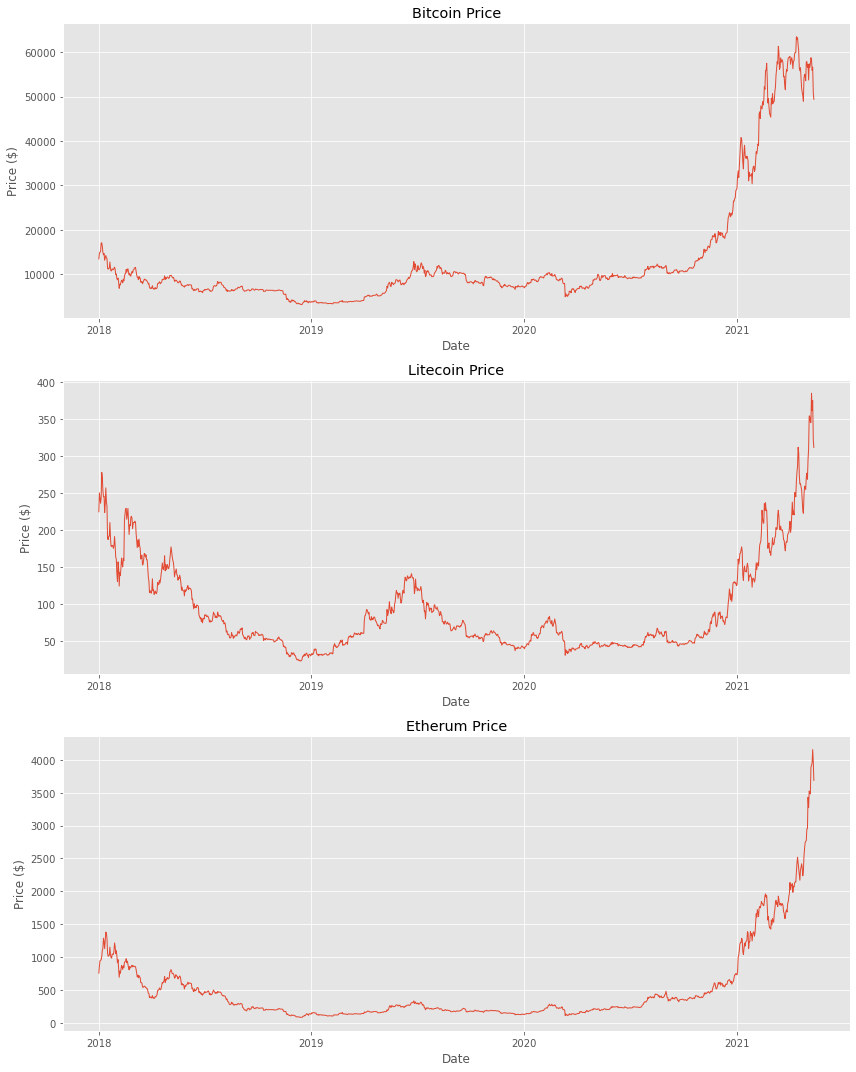

In [46]:
fig1, ax1 = plt.subplots(3,1, figsize = (12,15))
ax1[0].plot(btc_clean['PriceUSD'],linewidth=1)
ax1[0].set_ylabel('Price ($)')
ax1[0].set_xlabel('Date')
ax1[0].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax1[0].set_xticklabels(['2018','2019','2020','2021'])
ax1[0].set_title('Bitcoin Price')

ax1[1].plot(ltc_clean['PriceUSD'],linewidth=1)
ax1[1].set_ylabel('Price ($)')
ax1[1].set_xlabel('Date')
ax1[1].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax1[1].set_xticklabels(['2018','2019','2020','2021'])
ax1[1].set_title('Litecoin Price')

ax1[2].plot(eth_clean['PriceUSD'],linewidth=1)
ax1[2].set_ylabel('Price ($)')
ax1[2].set_xlabel('Date')
ax1[2].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax1[2].set_xticklabels(['2018','2019','2020','2021'])
ax1[2].set_title('Etherum Price')

fig1.tight_layout()
plt.show()

The plot shows that buying and holding Bitcoin and Etherum before 2021 would give you massive returns, but not so much with Litecoin, depending on when you bought it. What would the performance be for someone who was an active trader in crypto currencies? Let's see what the Return on Investment is when an asset is bought and held 5 and 30 days prior. Let's plot that:

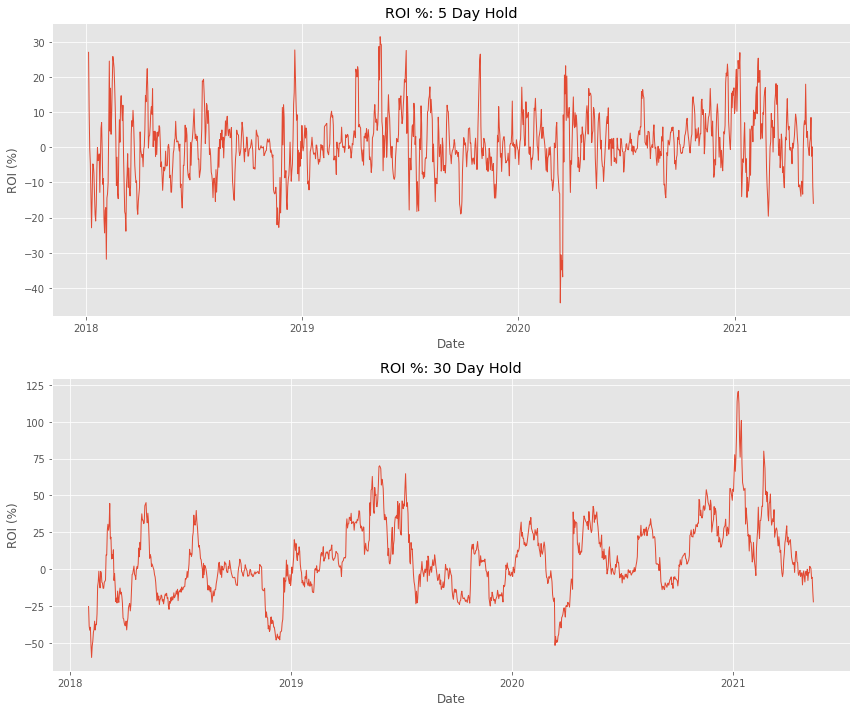

In [47]:
#Calculating the BTC ROI for 5 and 30 days:
BTC_ROI_5d = ((btc_clean.PriceUSD - btc_clean.PriceUSD.shift(5))/ btc_clean.PriceUSD.shift(5)) * 100
BTC_ROI_30d = ((btc_clean.PriceUSD - btc_clean.PriceUSD.shift(30))/ btc_clean.PriceUSD.shift(30)) * 100

fig2, ax2 = plt.subplots(2,1, figsize = (12,10))
ax2[0].plot(BTC_ROI_5d, linewidth=1)
ax2[0].set_ylabel('ROI (%)')
ax2[0].set_xlabel('Date')
ax2[0].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax2[0].set_xticklabels(['2018','2019','2020','2021'])
ax2[0].set_title('ROI %: 5 Day Hold')

ax2[1].plot(BTC_ROI_30d, linewidth=1)
ax2[1].set_ylabel('ROI (%)')
ax2[1].set_xlabel('Date')
ax2[1].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax2[1].set_xticklabels(['2018','2019','2020','2021'])
ax2[1].set_title('ROI %: 30 Day Hold')

fig2.tight_layout()
plt.show()

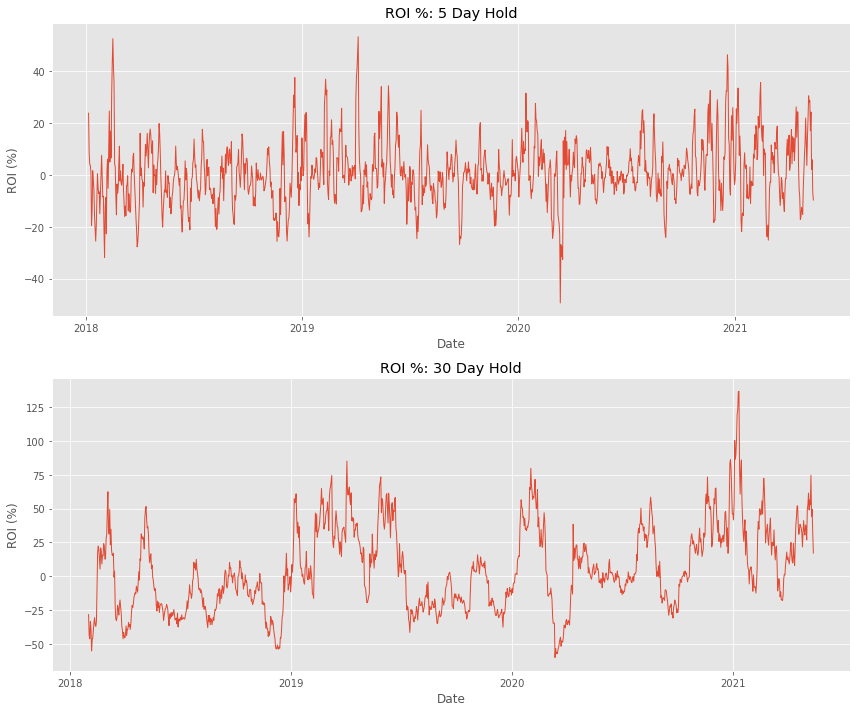

In [48]:
#Calculating the LTC ROI for 5 and 30 days:
LTC_ROI_5d = ((ltc_clean.PriceUSD - ltc_clean.PriceUSD.shift(5))/ ltc_clean.PriceUSD.shift(5)) * 100
LTC_ROI_30d = ((ltc_clean.PriceUSD - ltc_clean.PriceUSD.shift(30))/ ltc_clean.PriceUSD.shift(30)) * 100

fig3, ax3 = plt.subplots(2,1, figsize = (12,10))
ax3[0].plot(LTC_ROI_5d, linewidth=1)
ax3[0].set_ylabel('ROI (%)')
ax3[0].set_xlabel('Date')
ax3[0].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax3[0].set_xticklabels(['2018','2019','2020','2021'])
ax3[0].set_title('ROI %: 5 Day Hold')

ax3[1].plot(LTC_ROI_30d, linewidth=1)
ax3[1].set_ylabel('ROI (%)')
ax3[1].set_xlabel('Date')
ax3[1].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax3[1].set_xticklabels(['2018','2019','2020','2021'])
ax3[1].set_title('ROI %: 30 Day Hold')

fig3.tight_layout()
plt.show()

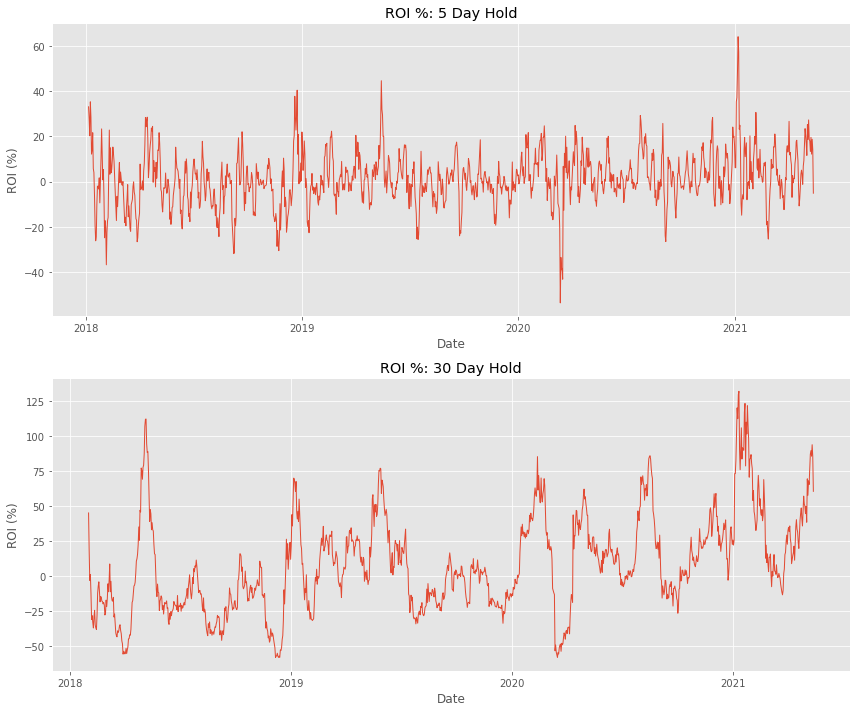

In [49]:
#Calculating the ETH ROI for 5 and 30 days:
ETH_ROI_5d = ((eth_clean.PriceUSD - eth_clean.PriceUSD.shift(5))/ eth_clean.PriceUSD.shift(5)) * 100
ETH_ROI_30d = ((eth_clean.PriceUSD - eth_clean.PriceUSD.shift(30))/ eth_clean.PriceUSD.shift(30)) * 100

fig4, ax4 = plt.subplots(2,1, figsize = (12,10))
ax4[0].plot(ETH_ROI_5d, linewidth=1)
ax4[0].set_ylabel('ROI (%)')
ax4[0].set_xlabel('Date')
ax4[0].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax4[0].set_xticklabels(['2018','2019','2020','2021'])
ax4[0].set_title('ROI %: 5 Day Hold')

ax4[1].plot(ETH_ROI_30d, linewidth=1)
ax4[1].set_ylabel('ROI (%)')
ax4[1].set_xlabel('Date')
ax4[1].set_xticks(['2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax4[1].set_xticklabels(['2018','2019','2020','2021'])
ax4[1].set_title('ROI %: 30 Day Hold')

fig4.tight_layout()
plt.show()

In [50]:
BTC_ROI_5d.describe()

count    1224.000000
mean        0.929424
std         8.947923
min       -44.266775
25%        -3.687037
50%         0.644126
75%         5.597096
max        31.476195
Name: PriceUSD, dtype: float64

In [51]:
BTC_ROI_30d.describe()

count    1199.000000
mean        6.548252
std        24.514513
min       -59.952601
25%        -8.717774
50%         3.119083
75%        22.699715
max       120.666959
Name: PriceUSD, dtype: float64

Based on the plots and statistical data, there is massive volatility in these cryptocurrencies. While one may not make any profit when buying and holding Litecoin above $150, there was a lot of money to be made actively trading Litecoin, with many occurances of an ROI above 50% between 2018 and 2021. However, the large gains from the high ROIs are countered by many days of large negative ROIs, although for BTC and ETH, they are smaller and fewer in comparision to the gains.

Next, let's examine the supply of the cryptocurrencies versus their prices:


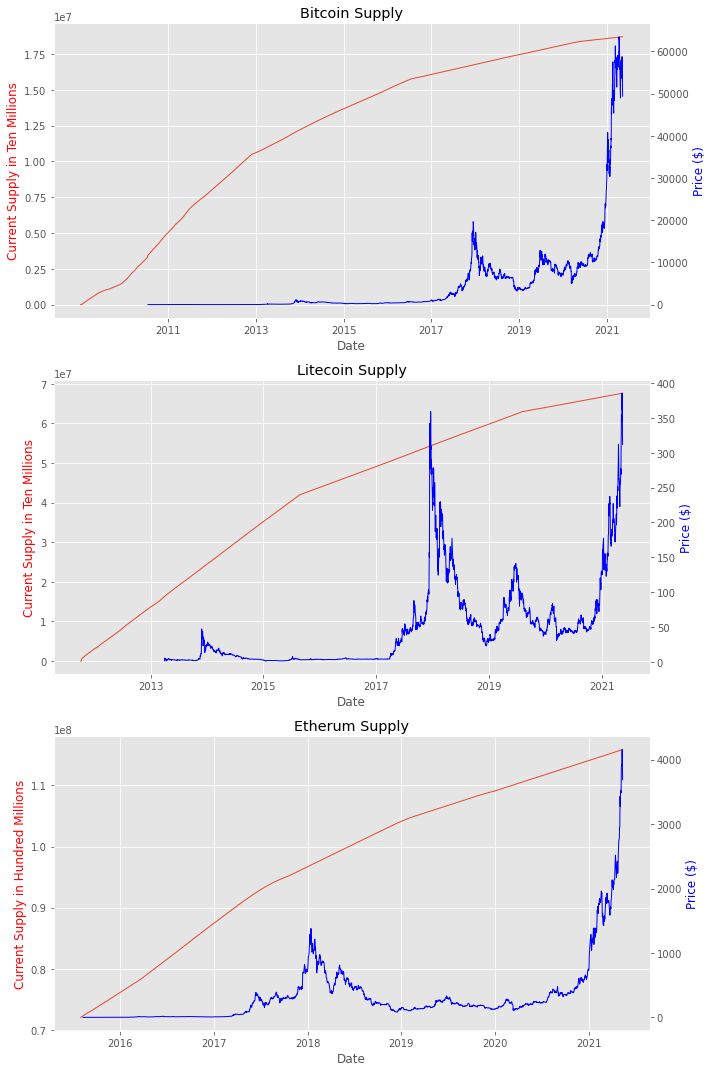

In [52]:
fig5, (ax5, ax6, ax7) = plt.subplots(3,1, figsize = (10,15))
ax5.plot(btc['date'],btc['SplyCur'],linewidth=1)
ax51 = ax5.twinx()
ax51.plot(btc['date'],btc['PriceUSD'],linewidth=1, color='blue')
ax5.set_ylabel('Current Supply in Ten Millions', color='red')
ax51.set_ylabel('Price ($)', color='blue')
ax51.grid(False)
ax5.set_xlabel('Date')
ax5.set_xticks(['2011-01-01','2013-01-01','2015-01-01','2017-01-01','2019-01-01','2021-01-01'])
ax5.set_xticklabels(['2011','2013','2015','2017','2019','2021'])
ax5.set_title('Bitcoin Supply')

ax6.plot(ltc['date'],ltc['SplyCur'],linewidth=1)
ax61 = ax6.twinx()
ax61.plot(ltc['date'],ltc['PriceUSD'],linewidth=1, color='blue')
ax6.set_ylabel('Current Supply in Ten Millions', color='red')
ax61.set_ylabel('Price ($)', color='blue')
ax61.grid(False)
ax6.set_xlabel('Date')
ax6.set_xticks(['2013-01-01','2015-01-01','2017-01-01','2019-01-01','2021-01-01'])
ax6.set_xticklabels(['2013','2015','2017','2019','2021'])
ax6.set_title('Litecoin Supply')

ax7.plot(eth['date'],eth['SplyCur'],linewidth=1)
ax71 = ax7.twinx()
ax71.plot(eth['date'],eth['PriceUSD'],linewidth=1, color='blue')
ax7.set_ylabel('Current Supply in Hundred Millions', color='red')
ax71.set_ylabel('Price ($)', color='blue')
ax71.grid(False)
ax7.set_xlabel('Date')
ax7.set_xticks(['2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01'])
ax7.set_xticklabels(['2016','2017','2018','2019','2020','2021'])
ax7.set_title('Etherum Supply')

fig5.tight_layout()
plt.show()

Bitcoin has a maximum of supply of 21 million, Litecoin has a maximum supply of 84 million, and Etherum does not have a cap on its supply. It appears that its is becoming slightly more difficult to mine for new Bitcoin and Litecoin, shown by the flatting slope of their plots, whereas the slope on the Ethereum plot has decreased slightly. While scarcity of a precious commodity tends to increase value, the unlimited supply of Ethereum does not appear to slow down it's value.

In [53]:
ax2.annotate(">1 degree",
    xy=(pd.Timestamp('2015-10-06'), 1),
    xytext=(pd.Timestamp('2008-10-06'),-0.2), 
    arrowprops={'arrowstyle':'->',"color":"gray"})

AttributeError: 'numpy.ndarray' object has no attribute 'annotate'

In [ ]:
# SETTING UP, I DONT KNOW WHAT THIS PURPOSE IS YET...
btc_2021 = btc_clean[btc_clean['date'] > '2021']
plt.plot(btc_2021['date'],btc_2021['PriceUSD'], linewidth=1)
plt.xticks(['2021-01-01','2021-02-01','2021-03-01','2021-04-01', '2021-05-01'],['Jan','Feb','Mar','Apr','May'])
plt.show()


## Conclusions